Nickels in front of a steam roller. Let $X_t ∼ N(µ, σ2)$. You have access to options on $X_t$ with payoff $(K − X_t)^+= \max(K − X_t, 0)$. 
The “fair” price of such an option is $P = \mathbb{E}[(K − Xt)^+]$.
+ Compute P explicitly in terms of the c.d.f of the standard normal
distribution .
+ Simulate an independent and identically distributed sequence $X_t$ (use
randn in Matlab) and suppose that every day you sell $N$ put options
with price $P$ and then you need to pay $N(K − X_{t+1})^+$ the next day. Thus, every day your bank account increases by $N \cdot (P − (K − X_t)^+).$ How quickly will you go bust? Make a plot of the evolution of your bank account for several simulations like this. Experiment with $K$ and other parameters.

In [1]:
from statistics import NormalDist
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def relu(x: float) -> float:
    if x > 0: return x
    return 0

def simulate(time: int, account: float, K: float, number_of_puts: int, mu: float, sigma2: float):
    history = [0]
    prices = NormalDist(mu, sigma2).samples(time)
    cdf = NormalDist(mu, sigma2).cdf
    pdf = NormalDist(mu, sigma2).pdf
    P = (K - mu) * cdf(K) + np.sqrt(sigma2) * pdf(K)
    date = 0
    while account >= 0 and date < time:
        account += number_of_puts * (P - relu(K-prices[date]))
        history.append(account)
        date = date + 1
    return history

green2, red: 98


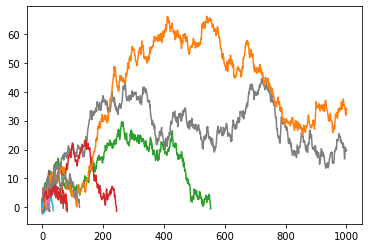

In [4]:
simulations= []
for i in range (100):
    history = simulate(1000, 0, 10, 1, 0, 1)
    simulations.append(history)

color = []
g = 0
r = 0
for s in simulations:
    if s[-1]<0: 
    #    color='red' 
       r = r + 1
    else: 
    #    color='green'
        g = g + 1
    plt.plot(np.arange(len(s)), s)

print(f'green{g}, red: {r}')
plt.show()